In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

import os
import cv2
import math

1.13.1


## Functions for extracting wings cordinates from the image

In [2]:
def getWingContours(mask, image):
    filtered_contours = []
    im_cont, contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))
    for i in range(0, len(contours)):
#        image2 = cv2.drawContours(image, [contours[i]], 0, (0,255,0), 5)
#        cv2.imshow('Contours' + str(i), image2)
        if len(contours[i]) < 350:
            #print("Too few points " + str(len(contours[i])))
            continue
        (x1 , y1, x2, y2) = getAABBfromContour(contours[i])
        if x2-x1 < 350 or x2-x1 > 600:
            #print("Not correct width " + str(x2-x1))
            continue
        filtered_contours.append(contours[i])

    return filtered_contours

In [3]:
def getAABBfromContour(contour):
    min_x = contour[0][0][0]
    max_x = contour[0][0][0]
    min_y = contour[0][0][1]
    max_y = contour[0][0][1]
    for j in range(0,len(contour)):
        if contour[j][0][0] < min_x:
            min_x = contour[j][0][0]
        if contour[j][0][0] > max_x:
            max_x = contour[j][0][0]
        if contour[j][0][1] < min_y:
            min_y = contour[j][0][1]
        if contour[j][0][1] > max_y:
            max_y = contour[j][0][1]
    return (min_x, min_y, max_x, max_y)

In [4]:
def getThresholdMask(image):
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(imgray,(5,5),0)
    ret3, mask = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    height, width = mask.shape
    mask = cv2.rectangle(mask,(0,0),(width-1,height-1),(255,255,255),2)
    return mask

# Start

## Extracting the wings position information from the image

In [5]:
filepath = os.path.join("C:\\","Homeroot","00Biodling","bee","WingDataFiles","bee","wings")
wingImagePath = os.path.join(filepath,"Images")
wingIndexPath = os.path.join(filepath, "WingIndexFiles")
contourWorkDir = os.path.join(filepath, "contours")
extractedImageDir = os.path.join(filepath, "extracted")

if os.path.exists(contourWorkDir) is False:
    os.mkdir(os.path.join(filepath, 'contours/'))
    print("creating contour directory")

if os.path.exists(extractedImageDir) is False:
    os.mkdir(os.path.join(filepath, 'extracted/'))
    print("creating extracted directory")


In [6]:
drawGraphs = 0

imageWidth= 500
imageHeight = 200

imageSize = [imageWidth, imageHeight]

imageFileName = "aby-acb-1717.jpg"
#imageFileName = "aby-acb-1779.jpg"
#imageFileName = "aby-acb-1806.jpg"
filename = os.path.join(wingImagePath,"ACB",imageFileName)
image =  cv2.imread(filename)
cv2.startWindowThread()




0

In [7]:
hist = cv2.calcHist([image],[0],None,[256],[0,256])

if (drawGraphs):
    #print("Kill histogram to continue")
    cv2.imshow('Original',image)
    cv2.waitKey(0)
    plt.plot(hist)
    plt.xlim([0,256])
    plt.show()
    cv2.destroyAllWindows()

In [8]:
mask = getThresholdMask(image)

if (drawGraphs):
    cv2.imshow('Mask',mask)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
wing_contours = getWingContours(mask, image)

#cv2.imshow('contours',wing_contours)
print ("Found " + str(len(wing_contours)) + " possible wings")
for contours in wing_contours:
    (x1 , y1, x2, y2) = getAABBfromContour(contours)
    #print(str(x1) + ", " + str(y1) + ", " + str(x2) + ", " + str(y2))
    cv2.rectangle(image,(x1,y1),(x2,y2),(255,0,0),5)
    
if (drawGraphs):
    cv2.imshow('KKK',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

10017
Found 28 possible wings


In [10]:
print(imageFileName)

test = os.path.join(contourWorkDir, "cont_" + imageFileName)
cv2.imwrite(test, image)

aby-acb-1717.jpg


True

## Functions for extracting info from wing index file

In [11]:
def getAllWingPoints(wingIndex):
    wingPoints = []
    wings = wingIndex["wings"]
    for wingInfo in wings:
        wingPoints.append([(int(wingInfo["x1"]), int(wingInfo["y1"])),
                          (int(wingInfo["x2"]), int(wingInfo["y2"])),
                          (int(wingInfo["x3"]), int(wingInfo["y3"])),
                          (int(wingInfo["x4"]), int(wingInfo["y4"])),
                          (int(wingInfo["x5"]), int(wingInfo["y5"])),
                          (int(wingInfo["x6"]), int(wingInfo["y6"])),
                          (int(wingInfo["x7"]), int(wingInfo["y7"]))
                          ])

    return wingPoints    

In [12]:
def getAllDvCiValues(wingIndex):
    wingDvCi = []
    wings = wingIndex["wings"]
    for wingInfo in wings:
        wingDvCi.append([(wingInfo["Dv"], wingInfo["Ci"])])
    return wingDvCi   

In [13]:
def getAllWingNames(wingIndex):
    wingNames = []
    wings = wingIndex["wings"]
    for wingInfo in wings:
        wingNames.append(wingInfo["image"])
    return wingNames

In [14]:
def getAllWingInfo(wingIndex):
    wingPoints = []
    wingNames = []
    wingCiDv = []
    wings = wingIndex["wings"]
    for wingInfo in wings:
        wingPoints.append([(int(wingInfo["x1"]), int(wingInfo["y1"])),
                          (int(wingInfo["x2"]), int(wingInfo["y2"])),
                          (int(wingInfo["x3"]), int(wingInfo["y3"])),
                          (int(wingInfo["x4"]), int(wingInfo["y4"])),
                          (int(wingInfo["x5"]), int(wingInfo["y5"])),
                          (int(wingInfo["x6"]), int(wingInfo["y6"])),
                          (int(wingInfo["x7"]), int(wingInfo["y7"]))
                          ])
        wingNames.append(wingInfo["image"])
        wingCiDv.append([wingInfo["Ci"], wingInfo["Dv"]])

    return [wingPoints, wingNames, wingCiDv]   

## Function to add all wing index points to image

In [15]:
def addAllWingPointsToImage(image, allWingPoints):
    for wingPoints in allWingPoints:
    #print(wingPoints)
        for points in wingPoints:
            #print(points)
            cv2.circle(image, points, 2, (0,255,0),-1)
    return

## Test code for extracting info from wing index file

In [16]:
"""
load json file for image and plot points
"""
import json

prefix="bee-wing-"
(name, ext) = os.path.splitext(imageFileName)
wingIndexName = os.path.join(wingIndexPath, prefix + name + "-x" + ".json")

if wingIndexName:
    print("open json wing index file")
    with open(wingIndexName, 'r') as f:
        wingIndex = json.load(f)
    #print(wingIndex)

open json wing index file


In [17]:
allWingsDvCi = []
allWingsDvCi = getAllDvCiValues(wingIndex)
allWingsDvCi[0]

[(-0.798, 1.279)]

In [18]:
allWingPoints = []
allWingPoints = getAllWingPoints(wingIndex)
#print(allWingPoints)
allWingPoints[0][0]

(344, 862)

In [19]:
allWingInfo = getAllWingInfo(wingIndex)
allWingInfo[0][1][0]

(396, 1052)

In [20]:
allWingNames = getAllWingNames(wingIndex)
allWingNames[0]

'bee-wing-aby-acb-1717-1.jpg'

## Test code for adding and saving wing index points to image

In [21]:
addAllWingPointsToImage(image, allWingPoints)

if (drawGraphs):
    cv2.imshow('KKK',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [22]:
print(imageFileName)
test = os.path.join(contourWorkDir, "points_" + imageFileName)
cv2.imwrite(test, image)
    

aby-acb-1717.jpg


True

## More functions

In [23]:
def getWingContourBoxes(wingContours):
    wingContourBoxes = []
    for contours in wingContours:
        (x1 , y1, x2, y2) = getAABBfromContour(contours)
        wingContourBoxes.append([x1, y1, x2, y2])
    wingContourBoxes.sort(key=lambda x: x[1])
    return wingContourBoxes
    


In [24]:
def findOneContourOneWingIndex(wingContourBoxes, allWingPoints):
    
    matchBoxes = []
    #for contours in wing_contours:
    for box in wingContourBoxes:
        overSizeHeight = 0
        occureInImage = 0
        x1 = box[0]
        y1 = box[1]
        x2 = box[2]
        y2 = box[3]
        y1y2 = y2-y1
        
        for point in allWingPoints:
            #print(point[0][0])
            if (x1 < point[0][0] < x2 and y1 < point[0][1] < y2):
                occureInImage = occureInImage + 1
        if occureInImage == 1:
            matchBoxes.append([x1, y1, x2, y2])
            
        #print("indInBox: " + str(occureInImage))
        #print(len(snipBoxes))
        #Rearrange the list for falling order of y1
    matchBoxes.sort(key=lambda x: x[1])
    return matchBoxes

## Test code for extracting wing contour frames

In [25]:
#wingContourBoxes = []
wingContourBoxes = getWingContourBoxes(wing_contours)
wingContourBoxes[1]

[37, 834, 553, 996]

In [26]:
#snipBoxes = checkContoursAgainstWingIndex(wingContourBoxes, allWingPoints)
snipBoxes = findOneContourOneWingIndex(wingContourBoxes, allWingPoints)
snipBoxes[0]

[37, 834, 553, 996]

## More functions

In [27]:
#should be used on boxes where duplicate wings are split
#def findOversizedHeightBox(wingBoxes, allWingPoints, imageHeight):
def findOversizedHeightBox(wingBoxes, allWingPoints, imageSize):
    i=0
    overSizedImageList = []
    for box in wingBoxes:
        overSizeHeight = 0
        occureInImage = 0
        x1 = box[0]
        y1 = box[1]
        x2 = box[2]
        y2 = box[3]
        y1y2 = y2-y1
        
        #if imageHeight <= y1y2:
        if imageSize[1] <= y1y2:
            overSizeHeight = 1
            
        for point in allWingPoints:
            if (x1 < point[0][0] < x2 and y1 < point[0][1] < y2):
                occureInImage = occureInImage + 1
        
        if overSizeHeight == 1 and occureInImage == 1:
            #print("Oversize height contour found in box: " + str(i))
            overSizedImageList.append(i)
            
        i=i + 1
    return overSizedImageList

In [28]:
def findImageBackground(image):
    hist = cv2.calcHist([image],[0],None,[256],[0,256])
    histMax = int(hist.argmax(axis=0)) # getting the color with most values in image so that rotation can set background color
   
    return (histMax, histMax, histMax)

In [29]:
def createWantedImage(img, boxToCut, imageSize):
    imgWidth = imageSize[0]
    imgHeight = imageSize[1]
    x1= boxToCut[0]
    y1= boxToCut[1]
    x2= boxToCut[2]
    y2= boxToCut[3]

    #Getting image background color to be used for padding.
    imgBackGroundColor = findImageBackground(image)
    #crop +20 (cropAdder) pixels to not miss boundary parts of the image from the imagemask
    #might not work as image can be to small to crop, lets see
    cropAdder = 0
    imgFirstCrop = img[y1-cropAdder:y2+cropAdder, x1-cropAdder:x2+cropAdder]

    #pad image so that crop can be made to wanted size
    pAdd = 100 #Padding to add att each side
    imgPadded= cv2.copyMakeBorder(imgFirstCrop,pAdd,pAdd,pAdd,pAdd,cv2.BORDER_CONSTANT,value=imgBackGroundColor)

    image_center = tuple(np.array(imgPadded.shape[1::-1]) / 2)
    #print("image center: " + str(image_center) )
    xCenter = int(image_center[0])
    yCenter = int(image_center[1])
    newX1 = int(xCenter - imgWidth/2)
    newX2 = int(xCenter + imgWidth/2)
    newY1 = int(yCenter - imgHeight/2)
    newY2 = int(yCenter + imgHeight/2)

    imgCrop = imgPadded[newY1:newY2, newX1:newX2]
    #print("Image crop size: " + str(imgCrop.shape))
    return imgCrop

## Functions to rotate images

In [30]:
def rotateImage(image, angle):   
    fillColor = findImageBackground(image)
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR, borderValue=fillColor)
    return result

In [31]:
def rotateAndResizeFromWingIndex(img, snipBoxes, overSizedImageList, allWingPoints, imageSize, plot):
    #print("Rotate and Resize")
    rotatedImages = []
    imgWidth = imageSize[0]
    imgHeight = imageSize[1]
    
    for overSizeimage in overSizedImageList:
        #print("Image index: " + str(overSizeimage))
        x1 = snipBoxes[overSizeimage][0]
        y1 = snipBoxes[overSizeimage][1]
        x2 = snipBoxes[overSizeimage][2]
        y2 = snipBoxes[overSizeimage][3]
        x1x2 = x2-x1
        y1y2 = y2-y1

        #roi = img[y1:y2, x1:x2] 
        roi = img[y1-10:y2+10, x1-50:x2+50] #adding some margin on X and Y as mask can be cutting some information   

        angle = 0;
        for point in allWingPoints:
            #print(point[0][0])
            if (x1 < point[0][0] < x2 and y1 < point[0][1] < y2):
                p1 = point[0]
                p2 = point[1]

                myradians = math.atan2(p2[1]-p1[1], p2[0]-p1[0])    
                mydegrees = math.degrees(myradians)
                #print("Radian: " + str(myradians))
                #print("Rotation angle :" + str(round(mydegrees,1)))
        
        roiRotate = rotateImage(roi, mydegrees)
        roiRotateBox = roiRotate.copy()

        roiMask = getThresholdMask(roiRotate)

        roi_wing_contours = getWingContours(roiMask, roiRotate)
        #print ("Found " + str(len(wing_contours)) + " possible wings")
        
        for contours in roi_wing_contours:
            (x1 , y1, x2, y2) = getAABBfromContour(contours)          
            #print("ContourBox cordinates: " + str(x1) + ", " + str(y1) + ", " + str(x2) + ", " + str(y2))

        #print a rectangle around the image for reference
        cv2.rectangle(roiRotateBox,(x1,y1),(x2,y2),(255,0,0),5)

        roiRotateCrop = createWantedImage(roiRotate, [x1,y1,x2,y2], imageSize)
        rotatedImages.append(roiRotateCrop)
        
        hist = cv2.calcHist([image],[0],None,[256],[0,256])
        if plot == 1:
            print("plotting images")
            plt.figure(100+overSizeimage)
            plt.title("Image histogram " + str(overSizeimage))
            plt.plot(hist)
            plt.figure(overSizeimage)
            plt.title("Images")
            plt.subplot(2,3,1), plt.imshow(roi), plt.title("Org image")
            plt.subplot(2,3,2), plt.imshow(roiRotate), plt.title("Rotated image")
            plt.subplot(2,3,3), plt.imshow(roiMask), plt.title("Mask")
            plt.subplot(2,3,4), plt.imshow(roiRotateBox), plt.title("Rotated + box")
            #plt.subplot(2,3,5), plt.imshow(roiRotatePadded), plt.title("Padded image")
            plt.subplot(2,3,6), plt.imshow(roiRotateCrop), plt.title("Wanted image")
        
    return rotatedImages

## Test code to find wings that needs to be rotated to fit wanted image format

In [32]:
"""
Create a list of boxes that are higher then the wanted image size. 
Checks against wing Index file
"""
#overSizedImageList = findOversizedHeightBox(wingContourBoxes, allWingPoints, imageSize)
overSizedImageList = findOversizedHeightBox(snipBoxes, allWingPoints, imageSize)
print("Image list index oversized height " + str(overSizedImageList))

Image list index oversized height [2, 4, 9, 16]


51
plotting images
40
plotting images
83
plotting images
42
plotting images


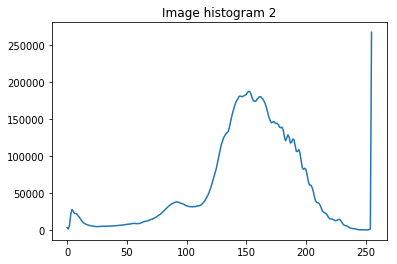

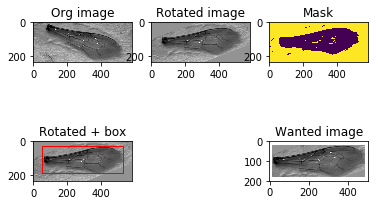

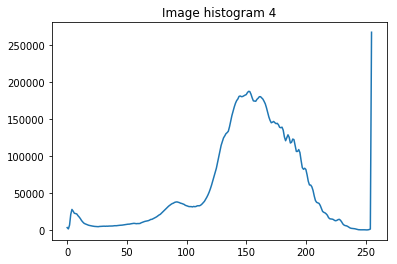

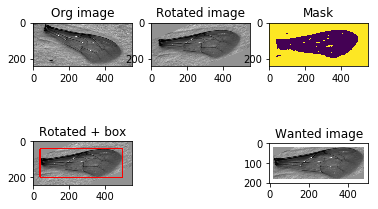

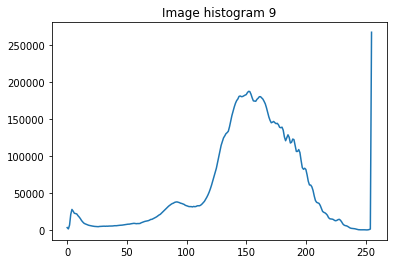

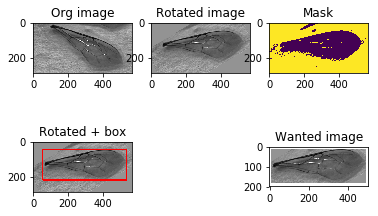

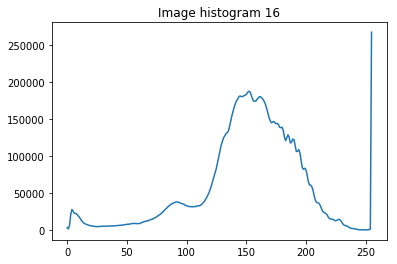

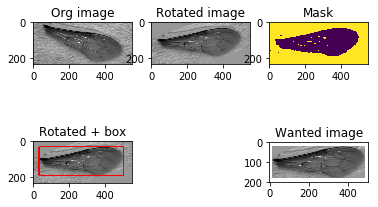

In [33]:
"""
Rotate and resize images based on info from wing index file
"""
image2 =  cv2.imread(filename)
plot = 1
#rotateAndResizeFromWingIndex(image2, snipBoxes, overSizedImageList, allWingPoints, imageHeight)
rotatedImages = rotateAndResizeFromWingIndex(image2, snipBoxes, overSizedImageList, allWingPoints, imageSize, plot)

## Functions for handling duplicate wings in Boxes

This functions needs some more work to function properly

In [34]:
#should be used on boxes where duplicate wings are split
def findDuplicateWingsInBox(wingBoxes, allWingPoints):
    i=0
    duplicateWingList = []
    for box in wingBoxes:
        #overSizeHeight = 0
        occureInImage = 0
        x1 = box[0]
        y1 = box[1]
        x2 = box[2]
        y2 = box[3]
            
        for point in allWingPoints:
            if (x1 < point[0][0] < x2 and y1 < point[0][1] < y2):
                occureInImage = occureInImage + 1
        
        if occureInImage > 1:
            #print("Oversize height contour found in box: " + str(i))
            duplicateWingList.append([i, occureInImage])
            
        i=i + 1
    return duplicateWingList

In [36]:
def splitDuplicateWingsInBox(wingContourBoxes, allWingPoints, duplicateWingList, image123):
    splitWings = []
    
    for index, noImages in duplicateWingList:
        print(index)
        x1 = wingContourBoxes[index][0]
        y1 = wingContourBoxes[index][1]
        x2 = wingContourBoxes[index][2]
        y2 = wingContourBoxes[index][3]
        plt.figure(index)
        plt.subplot(noImages+1,1,1), plt.imshow(image123[y1:y2, x1:x2]), plt.title("Org image")
        y1y2= y2-y1

        yDivider = int(y1y2/noImages)
        yDividerFraction = int(yDivider/2)
        yStart = y1
        yStop = y2     
        print(str(x1) + ", " + str(y1) + ", " + str(x2) + ", " + str(y2))
        
        for i in range  (0, noImages):
            yStop = yStart + yDivider + yDividerFraction
            #splitWings.append([x1, yStart, x2, yStop])
            plt.subplot(noImages+1,1,2+i), plt.imshow(image123[yStart:yStop, x1:x2])#, plt.title("Split: " + str(i+1))
            yStart = yStart+ yDividerFraction
        
    
    return splitWings

## Test code for splitting duplicate wings 

In [ ]:
#duplicateList = findDuplicateWingsInBox(snipBoxes, allWingPoints)
duplicateList = findDuplicateWingsInBox(wingContourBoxes, allWingPoints)
duplicateList

2
137, 1012, 608, 1367
5
151, 1897, 741, 2221
8
248, 2870, 770, 3232


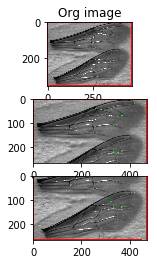

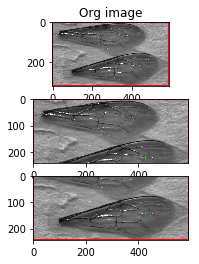

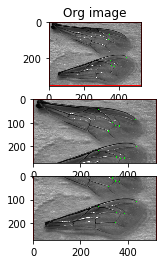

In [37]:
splitedWingsBoxes = splitDuplicateWingsInBox(wingContourBoxes, allWingPoints, duplicateList, image)


## Function to match wing index with wing frame in image

In [38]:
def getImageWingIndexMatch(boxes, allWingPoints):
    imageBoxWingIndexMatch = []
    for box in boxes:

        x1 = box[0]
        y1 = box[1]
        x2 = box[2]
        y2 = box[3]

        i = 0
        for point in allWingPoints:
            #print(point[0][0])
            if (x1 < point[0][0] < x2 and y1 < point[0][1] < y2):
                imageBoxWingIndexMatch.append(i)
                #print(imageBoxWingIndexMatch)
            i = i + 1
    return imageBoxWingIndexMatch
    


In [39]:
imageIndexMatch = getImageWingIndexMatch(snipBoxes, allWingPoints)
print(imageIndexMatch)

[0, 3, 4, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


## Extracting all images from the wing strip 

In [40]:
def extractAndSaveAllImages(img, boxes, imageIndexMatch, allWingNames, allWingPoints, imageSize, plot):
    plt.close('all')
    intPlot = 0
    #cutting out images that has the right size and save to image
    #--------------------------------------------------------------
    for index in range(0, len(boxes)):
        #print(snipBoxes[index])
        x1 = boxes[index][0]
        y1 = boxes[index][1]
        x2 = boxes[index][2]
        y2 = boxes[index][3]
        y1y2 = y2-y1
        #print("cordinates: " + str(x1) + ", " + str(y1) + ", " + str(x2) + ", " + str(y2))
        if imageSize[1] >= y1y2:
            #print(index)
            imageToWrite = createWantedImage(img, boxes[index], imageSize)
            if plot == 1:
                plt.figure(index)
                plt.imshow(imageToWrite), plt.title(allWingNames[imageIndexMatch[index]])

            imageFileToWrite = os.path.join(extractedImageDir, allWingNames[imageIndexMatch[index]])
            print("saving image: " + allWingNames[imageIndexMatch[index]])
            cv2.imwrite(imageFileToWrite, imageToWrite)

    #cutting out images that is over sized and needs to be rotated
    #--------------------------------------------------------------
    print("Cutting and rotating")
    overSizedList = findOversizedHeightBox(boxes, allWingPoints, imageSize)
    rotatedImages = rotateAndResizeFromWingIndex(img, boxes, overSizedList, allWingPoints, imageSize, intPlot)
    #print(rotatedImages)

    for index in range(0, len(rotatedImages)):
        print("Rotating image index: " + str(overSizedList[index]))
        imageToWrite = rotatedImages[index]
        
        if plot == 1:
            plt.figure(overSizedList[index])
            plt.imshow(imageToWrite), plt.title(allWingNames[imageIndexMatch[overSizedList[index]]])

        imageFileToWrite = os.path.join(extractedImageDir, allWingNames[imageIndexMatch[overSizedList[index]]])
        print("saving image: " + allWingNames[imageIndexMatch[overSizedList[index]]])        
        cv2.imwrite(imageFileToWrite, imageToWrite)
    
    #cutting out images that needs t be split and divide in to more then one image
    #--------------------------------------------------------------
    #Not don eyet
    #Code to be added

In [41]:

def writeExtractInfo(f_dir, file, dataToWrite):
    import json
    
    #row, col = dataToWrite.shape
    rows = len(dataToWrite)
    f_name, f_ext = file.split('.')
    fnameJson = os.path.join(f_dir, f_name + "-extracted-info" + ".json")
    
    data = {}
    data['meta'] = {}
    data['meta'] = {'extracted file': file}
    data['extract info'] = []
    for x in range(0, rows):
        data['extract info'].append({
            'wing contours' : dataToWrite[x][0],
            'wing indexes' : dataToWrite[x][1],
            'wing singles' : dataToWrite[x][2],
            'wing duplicates' : dataToWrite[x][3]
        })
    with open(fnameJson, 'w') as jsonfile:
        json.dump(data, jsonfile, indent=2)


## Helper function 

In [ ]:
# finds files with certain extension
# works only with one 'dot' in file name    
def findFilesExt(ext):
    fileNames = np.array([], dtype=str)
    for f in os.listdir():
        #print(f)
        f_name, f_ext = os.path.splitext(f)
        #print(f_name, f_ext)
        if f_ext==ext:
            #print(f)
            fileNames = np.append(fileNames, f)
    return fileNames

## Extract and store images from cutted boxes 

In [ ]:
"""
Extracts all possible images from a wing image strip file,
where it has a corresponding information from a wing index file.
1. Opens a file "AAA.jpg"
2. Opens a corresponding wing index file in .json format that is named "bee-wing-AAA-x.json"
3. Extracts all single images with index information
4. Cuts out and store images that fits in the image size specified
5. Rotate and store images that is over sized 
6. Prints a simple result file

Not implemented
extract of duplicate images in a mask section
"""

def extractAll(wingImagePath, imageFileName, wingIndexPath, extractedImageDir, imageSize, plot):
    filename = os.path.join(wingImagePath,imageFileName)


    image33 =  cv2.imread(filename)

    """
    load json file for image and plot points
    """
    import json

    prefix="bee-wing-"
    (name, ext) = os.path.splitext(imageFileName)
    print("wingIndexName: " + name)
    wingIndexName = os.path.join(wingIndexPath, prefix + name + "-x" + ".json")

    if wingIndexName:
        print("open json wing index file: " + wingIndexName)
        with open(wingIndexName, 'r') as f:
            wingIndex = json.load(f)
        #print(wingIndex)
    else :
        print("missing wing Index file: " + wingIndexName )


    print("Creating mask")
    mask1 = getThresholdMask(image33)
    wing_contours1 = getWingContours(mask1, image33)
    wingContourBoxes1 = getWingContourBoxes(wing_contours1)
    noWingContours = len(wingContourBoxes)
    
    print("Wingpoints")
    allWingPoints1 = getAllWingPoints(wingIndex)
    allWingNames1 = getAllWingNames(wingIndex)
    noWingIndex = len(allWingNames1)

    snipBoxes1 = findOneContourOneWingIndex(wingContourBoxes1, allWingPoints1)
    noSingleWings = len(snipBoxes1)

    imageIndexMatch1 = getImageWingIndexMatch(snipBoxes1, allWingPoints1)

    extractAndSaveAllImages(image33, snipBoxes1, imageIndexMatch1, allWingNames1, allWingPoints1, imageSize, plot)

    duplicateWingList1 = findDuplicateWingsInBox(wingContourBoxes, allWingPoints1)
    noDuplicateWings = len(duplicateWingList1)



    dataToWrite1 = np.array([],dtype=int) 
    dataToWrite1 = [[noWingContours, noWingIndex, noSingleWings, noDuplicateWings]]

    
    extractInfoDir = os.path.join(extractedImageDir,"extractInfo")
    if os.path.exists(extractInfoDir) is False:
        os.mkdir(os.path.join(extractedImageDir, 'extractInfo/'))
        print("creating extractInfo directory")
        
    writeExtractInfo(extractInfoDir, imageFileName, dataToWrite1)

    print("-----------------------\n" + "Extract info for " + imageFileName + "\n" +
         "Wing contours found: " + str(noWingContours) + "\n" +
         "Wing index found: " + str(noWingIndex) + "\n" +
         "single wings match: " + str(noSingleWings) + "\n" +
         "Duplicate wings: " + str(noDuplicateWings) + "\n" +
         "-----------------------\n")

## All in one 

In [42]:
filepath = os.path.join("C:\\","Homeroot","00Biodling","bee","WingDataFiles","bee","wings")
wingImagePath = os.path.join(filepath,"Images")
wingIndexPath = os.path.join(filepath, "WingIndexFiles")
contourWorkDir = os.path.join(filepath, "contours")
extractedImageDir = os.path.join(filepath, "extracted")

if os.path.exists(contourWorkDir) is False:
    os.mkdir(os.path.join(filepath, 'contours/'))
    print("creating contour directory")

if os.path.exists(extractedImageDir) is False:
    os.mkdir(os.path.join(filepath, 'extracted/'))
    print("creating extracted directory")

### Extract wings from single image    

In [46]:
"""
Single shot on specific file 
"""
plt.close('all')

plot = 1

imageWidth= 500
imageHeight = 200
imageSize = [imageWidth, imageHeight]

wingImagePathAcb = os.path.join(wingImagePath, "ACB")
imageFileName = "aby-acb-1717.jpg"
#imageFileName = "aby-acb-1779.jpg"
#imageFileName = "aby-acb-1806.jpg"
imageFileName = "aby-acb-1845.jpg"
imageFileName = "bjurholm-acb-1701.jpg"
#imageFileName = "bjurholm-acb-1710.jpg"


wingImagePathAcb = os.path.join(wingImagePath, "IP")
imageFileName = "Evert 1.jpg"


extractAll(wingImagePathAcb, imageFileName, wingIndexPath, extractedImageDir, imageSize, plot)

wingIndexName: Evert 1
open json wing index file: C:\Homeroot\00Biodling\bee\WingDataFiles\bee\wings\WingIndexFiles\bee-wing-Evert 1-x.json
Creating mask
55
Wingpoints
Cutting and rotating
-----------------------
Extract info for Evert 1.jpg
Wing contours found: 28
Wing index found: 26
single wings match: 0
Duplicate wings: 0
-----------------------



### Extract wings from multiple image files in specific directory - box version
Sub directories not included
This code cuts out box information from image strip and stores all cut information in an image

In [50]:
   """
   Extract images from all files in a certain directory.
   """
    plt.close('all')

    plot = 0

    imageWidth= 500
    imageHeight = 200
    imageSize = [imageWidth, imageHeight] 
    
    print("Converting .jpg wing files")
    wingImagePathAcb = os.path.join(wingImagePath, "ACB")
    wingImagePathAcb = os.path.join(wingImagePath, "IP")

    
    os.chdir(wingImagePathAcb)
    files = findFilesExt('.jpg')
    if len(files) == 0:
        print("No wingindex (.jpg) files found")
    #print(files)
    ##wingData = np.array([],dtype=int)
    
    print("converting files in directory:\n" + wingImagePathAcb)
    for ff in files:
        file = ff
        #print("Conv:", file, "\tfrom:\t", wingImagePathACB)
        print("----------------------------------------------------------------\n" +
              "Conv:", file +
             "\n----------------------------------------------------------------")
        extractAll(wingImagePathAcb, file, wingIndexPath, extractedImageDir, imageSize, plot)

Converting .jpg wing files
converting files in directory:
C:\Homeroot\00Biodling\bee\WingDataFiles\bee\wings\Images\IP
----------------------------------------------------------------
Conv: Boris 3.jpg
----------------------------------------------------------------
wingIndexName: Boris 3
open json wing index file: C:\Homeroot\00Biodling\bee\WingDataFiles\bee\wings\WingIndexFiles\bee-wing-Boris 3-x.json
Creating mask
51
Wingpoints
Cutting and rotating
-----------------------
Extract info for Boris 3.jpg
Wing contours found: 28
Wing index found: 23
single wings match: 0
Duplicate wings: 0
-----------------------

----------------------------------------------------------------
Conv: Evert 1.jpg
----------------------------------------------------------------
wingIndexName: Evert 1
open json wing index file: C:\Homeroot\00Biodling\bee\WingDataFiles\bee\wings\WingIndexFiles\bee-wing-Evert 1-x.json
Creating mask
55
Wingpoints
Cutting and rotating
-----------------------
Extract info for Ev

wingIndexName: SC 12209 Hjoggbole 2013
open json wing index file: C:\Homeroot\00Biodling\bee\WingDataFiles\bee\wings\WingIndexFiles\bee-wing-SC 12209 Hjoggbole 2013-x.json
Creating mask
47869
Wingpoints
Cutting and rotating
-----------------------
Extract info for SC 12209 Hjoggbole 2013.jpg
Wing contours found: 28
Wing index found: 26
single wings match: 0
Duplicate wings: 0
-----------------------

----------------------------------------------------------------
Conv: Wassvik-OW-2016.jpg
----------------------------------------------------------------
wingIndexName: Wassvik-OW-2016
open json wing index file: C:\Homeroot\00Biodling\bee\WingDataFiles\bee\wings\WingIndexFiles\bee-wing-Wassvik-OW-2016-x.json
Creating mask
3260
Wingpoints
saving image: Wassvik-OW-2016-2.jpg
saving image: Wassvik-OW-2016-3.jpg
saving image: Wassvik-OW-2016-4.jpg
saving image: Wassvik-OW-2016-7.jpg
saving image: Wassvik-OW-2016-9.jpg
saving image: Wassvik-OW-2016-11.jpg
saving image: Wassvik-OW-2016-13.jpg


### Extract wings from multiple image files in specific directory - mask version
Sub directories not included
This code cuts out only the masked wings and paste them on a white background in a wanted size

In [51]:
"""
Extracts all possible images from a wing image strip file,
where it has a corresponding information from a wing index file.
1. Opens a file "AAA.jpg"
2. Opens a corresponding wing index file in .json format that is named "bee-wing-AAA-x.json"
3. Extracts all single images with index information
4. Cuts out and store images from mask on a white background with a specified image size (must be > width of wing)
5. Returns a list of images 
"""

def extractAllMask(wingImagePath, imageFileName, wingIndexPath, imageSize, plot):
    filename = os.path.join(wingImagePath,imageFileName)


    img =  cv2.imread(filename)

    """
    load json file for image and plot points
    """
    import json

    prefix="bee-wing-"
    (name, ext) = os.path.splitext(imageFileName)
    print("wingIndexName: " + name)
    wingIndexName = os.path.join(wingIndexPath, prefix + name + "-x" + ".json")

    if wingIndexName:
        print("open json wing index file: " + wingIndexName)
        with open(wingIndexName, 'r') as f:
            wingIndex = json.load(f)
        #print(wingIndex)
    else :
        print("missing wing Index file: " + wingIndexName )


    print("Creating mask")
    mask = getThresholdMask(img)
    plt.figure()
    plt.imshow(mask)
    wing_contours = getWingContours(mask, img)
    
    #wingContourBoxes1 = getWingContourBoxes(wing_contours1)
    #noWingContours = len(wingContourBoxes)
    
    print("Wingpoints")
    allWingPoints1 = getAllWingPoints(wingIndex)
    allWingNames1 = getAllWingNames(wingIndex)
    noWingIndex = len(allWingNames1)

"""
To be continued


"""




'\nTo be continued\n\n\n'

Converting .jpg wing files
converting files in directory:
C:\Homeroot\00Biodling\bee\WingDataFiles\bee\wings\Images\IP
----------------------------------------------------------------
Conv: Boris 3.jpg
----------------------------------------------------------------
wingIndexName: Boris 3
open json wing index file: C:\Homeroot\00Biodling\bee\WingDataFiles\bee\wings\WingIndexFiles\bee-wing-Boris 3-x.json
Creating mask
51
Wingpoints
----------------------------------------------------------------
Conv: Evert 1.jpg
----------------------------------------------------------------
wingIndexName: Evert 1
open json wing index file: C:\Homeroot\00Biodling\bee\WingDataFiles\bee\wings\WingIndexFiles\bee-wing-Evert 1-x.json
Creating mask
55
Wingpoints
----------------------------------------------------------------
Conv: IA F1.jpg
----------------------------------------------------------------
wingIndexName: IA F1
open json wing index file: C:\Homeroot\00Biodling\bee\WingDataFiles\bee\wings\Wing

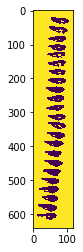

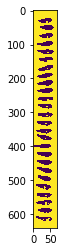

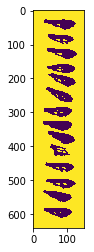

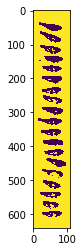

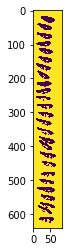

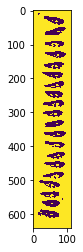

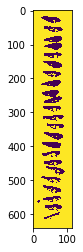

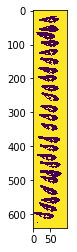

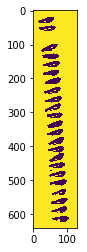

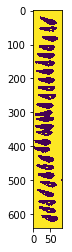

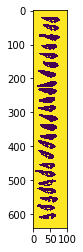

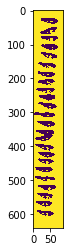

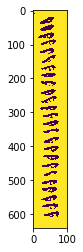

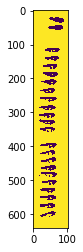

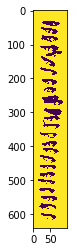

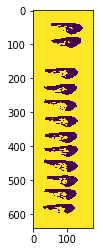

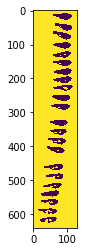

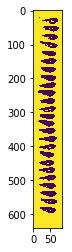

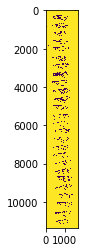

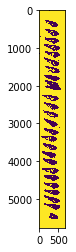

In [54]:
    """
    Extract images from all files in a certain directory.
    """
    plt.close('all')

    plot = 0

    imageWidth= 500
    imageHeight = 200
    imageSize = [imageWidth, imageHeight] 

    print("Converting .jpg wing files")
    wingImagePathAcb = os.path.join(wingImagePath, "ACB")
    wingImagePathAcb = os.path.join(wingImagePath, "IP")


    os.chdir(wingImagePathAcb)
    files = findFilesExt('.jpg')
    if len(files) == 0:
        print("No wingindex (.jpg) files found")
    #print(files)
    ##wingData = np.array([],dtype=int)

    allWingImages = []
    print("converting files in directory:\n" + wingImagePathAcb)
    for ff in files:
        file = ff
        maskImageList = []
        #print("Conv:", file, "\tfrom:\t", wingImagePathACB)
        print("----------------------------------------------------------------\n" +
              "Conv:", file +
             "\n----------------------------------------------------------------")
        maskImageList = extractAllMask(wingImagePathAcb, file, wingIndexPath, imageSize, plot)

        allWingImages.append(maskImageList)


In [58]:
len(allWingImages)

20

In [ ]:
 #printing some test info
  
    image =  cv2.imread(filename)
    
    
    font        = cv2.FONT_HERSHEY_SIMPLEX
    #textStart  = (10,500)
    fontScale   = 1
    color   = (0,0,255)
    lineType    = 2  
    
    i=0
    for box in snipBoxes:
        #print(box)
        x1 = box[0]
        y1 = box[1]
        x2 = box[2]
        y2 = box[3]
        xCenter = round(x1 + (x2-x1)/2)
        yCenter = round(y1 + (y2-y1)/2, 0)
        newX1 = int(xCenter - imageWidth/2)
        newX2 = int(xCenter + imageWidth/2)
        newY1 = int(yCenter - imageHeight/2)
        newY2 = int(yCenter + imageHeight/2)

        image = cv2.rectangle(image,(newX1,newY1),(newX2,newY2),color,2)

        (name, ext) = os.path.splitext(imageFileName)

        textToAdd = allWingNames[imageIndexMatch[i]]
        textStart = (newX1, newY1)
        cv2.putText(image, textToAdd, textStart, 
            font, fontScale, color, lineType)
        i = i+1

In [ ]:
    print(imageFileName)
    test = os.path.join(contourWorkDir, "newCont_" + imageFileName)
    #cv2.imwrite(test + os.path.basename(filename), image)
    cv2.imwrite(test, image)